# Text2Img

- https://huggingface.co/sd-community/sdxl-flash

In [5]:
import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverSinglestepScheduler
import matplotlib.pyplot as plt

In [14]:
# 
# Load model.
pipe = StableDiffusionXLPipeline.from_pretrained("sd-community/sdxl-flash", torch_dtype=torch.float16)

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = DPMSolverSinglestepScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Nvidia GPU가 있는 경우
# pipe = pipe.to("cuda")

# M시리즈 Mac일 경우
# 참고: https://huggingface.co/docs/diffusers/optimization/mps
pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
# pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [15]:
# Image generation.
img = pipe("a happy dog, sunny day, realism", num_inference_steps=7, guidance_scale=3).images[0]

Changing scheduler {self.config} to have `lower_order_final` set to True to handle uneven amount of inference steps. Please make sure to always use an even number of `num_inference steps when using `lower_order_final=False`.


  0%|          | 0/7 [00:00<?, ?it/s]

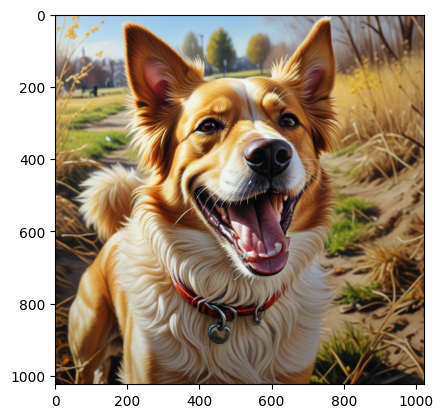

In [16]:
plt.imshow(img)

In [18]:
img.save("happy_dog.png")

# Img2Img

- https://huggingface.co/stabilityai/sdxl-turbo

In [19]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image

In [ ]:
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")

# Nvidia GPU가 있는 경우
# pipe = pipe.to("cuda")

# M시리즈 Mac일 경우
# 참고: https://huggingface.co/docs/diffusers/optimization/mps
pipe = pipe.to("mps") 

# Recommended if your computer has < 64 GB of RAM
# pipe.enable_attention_slicing()

init_image = load_image("happy_dog.png").resize((512, 512))

prompt = "dog wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

In [32]:
image = pipe(prompt, image=init_image, num_inference_steps=5, strength=0.7, guidance_scale=0.0).images[0]

  0%|          | 0/3 [00:00<?, ?it/s]

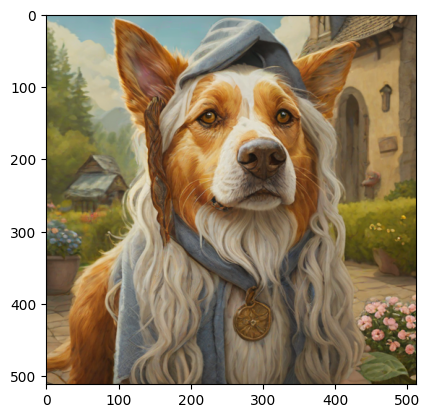

In [33]:
plt.imshow(image)

In [34]:
image.save("wizard_dog.png")